# Coronary Heart Disease

Using features such as age, diabetes status, smoking history, cholesterol levels, and body mass index (BMI),
we'll predict whether or not an individual is likely to suffer from coronary heart disease (CHD).

In [1]:
import os
os.getcwd()

'C:\\Users\\Hanfi\\Desktop\\Projects'

### Import all scientific and visualization packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

## visualization packages

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
framingham = pd.read_csv('framingham.csv')

In [3]:
# print the first 5 rows of data
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Understand datatypes present in dataframe

In [4]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Data cleaning

#### Count the number of missing values in the dataframe

In [5]:
# count the number of NaN values in each column
print(framingham.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


### Data Imputation

In [6]:
## Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

framingham.glucose=framingham['glucose'].transform(impute_median)
framingham.education=framingham['education'].transform(impute_median)
framingham.heartRate=framingham['heartRate'].transform(impute_median)
framingham.totChol=framingham['totChol'].transform(impute_median)
framingham.BPMeds=framingham['BPMeds'].transform(impute_median)

In [7]:
## group by classes that are in relation with other classes
by_currentSmoker_class=framingham.groupby(['currentSmoker'])
framingham.cigsPerDay=by_currentSmoker_class['cigsPerDay'].transform(impute_median)
by_age_class=framingham.groupby(['male','diabetes'])
framingham.BMI=by_age_class['BMI'].transform(impute_median)

In [8]:
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798605,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.071386,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Data Visualization

In [9]:
def persontype_func(gender):
    if gender.item()==1:
        return 'Male'
    else:
        return 'Female' 
framingham['PersonType'] = framingham[['male']].apply(persontype_func, axis=1)

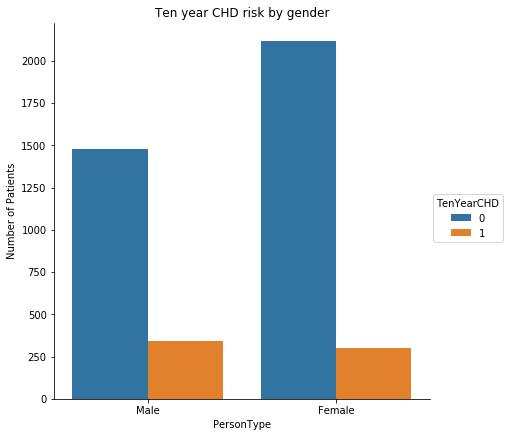

In [10]:
# How is 10-year risk of Coronary Heart Disease affect gender?

mx = sns.factorplot(x="PersonType", hue='TenYearCHD',data=framingham, kind="count", size=6)
mx.set(ylabel='Number of Patients')
plt.title('Ten year CHD risk by gender');

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Agewise distribution of the patients')

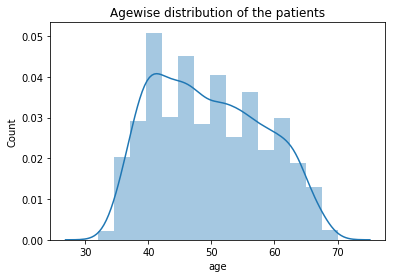

In [11]:
sns.distplot(framingham['age'], bins=15, kde=True)
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

In [12]:
def agetype_func(age):
    
    if age.item()<40:
        return 'Young'
    elif age.item()>=40 and age.item()<50:
        return 'Middle aged (40-50)' 
    elif age.item()>=50 and age.item()<60:
        return 'Middle aged(50-60)'
    else:
        return 'Old(>60)'
framingham['AgeType'] = framingham[['age']].apply(agetype_func, axis=1)

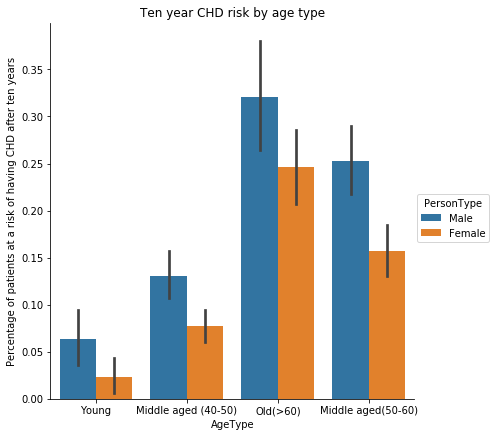

In [13]:
# How is 10-year risk of Coronary Heart Disease affect age?
mx = sns.factorplot(x="AgeType",y='TenYearCHD', hue='PersonType',data=framingham, kind="bar", size=6)
mx.set(ylabel='Percentage of patients at a risk of having CHD after ten years')
plt.title('Ten year CHD risk by age type');

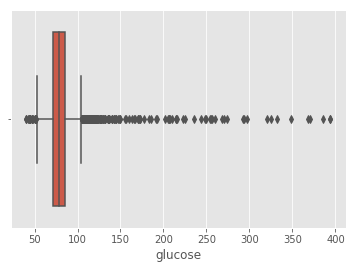

In [14]:
from matplotlib import style
style.use('ggplot')
#plt.figure(figsize=(12,4))
sns.boxplot(x='glucose',data=framingham)

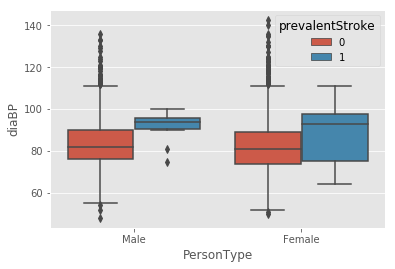

In [15]:
g = sns.boxplot(x="PersonType", y="diaBP",hue="prevalentStroke",data=framingham)

In [16]:
def hyper_func(hyper):
    if hyper.item()==1:
        return 'Has hypertension'
    else:
        return 'No hypertension' 
framingham['hasHyper'] = framingham[['prevalentHyp']].apply(hyper_func, axis=1)

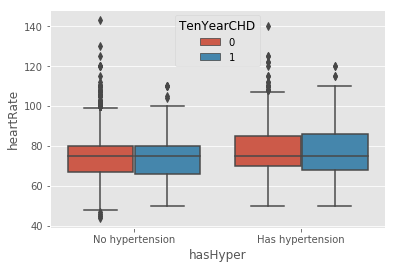

In [17]:
g = sns.boxplot(x="hasHyper", y="heartRate",hue="TenYearCHD",data=framingham)

Text(0.5,1,'Scatterplot of systolic blood pressure vs age type coloured by people who are at risk of CHD')

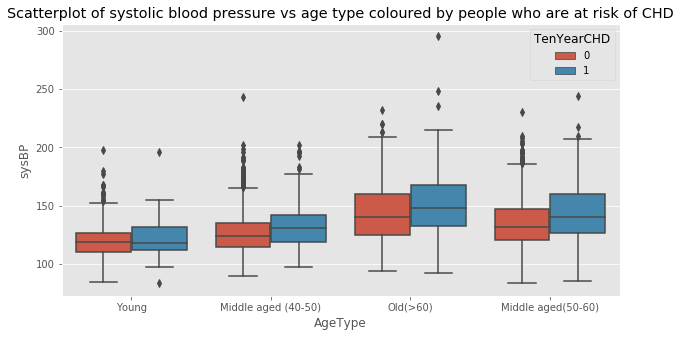

In [18]:
# As systolic blood pressure increases for each age group there is higher chance for CHD to develop after 10 years
plt.figure(figsize=(10,5))
sns.boxplot('AgeType','sysBP', data=framingham, hue="TenYearCHD")
plt.title('Scatterplot of systolic blood pressure vs age type coloured by people who are at risk of CHD')

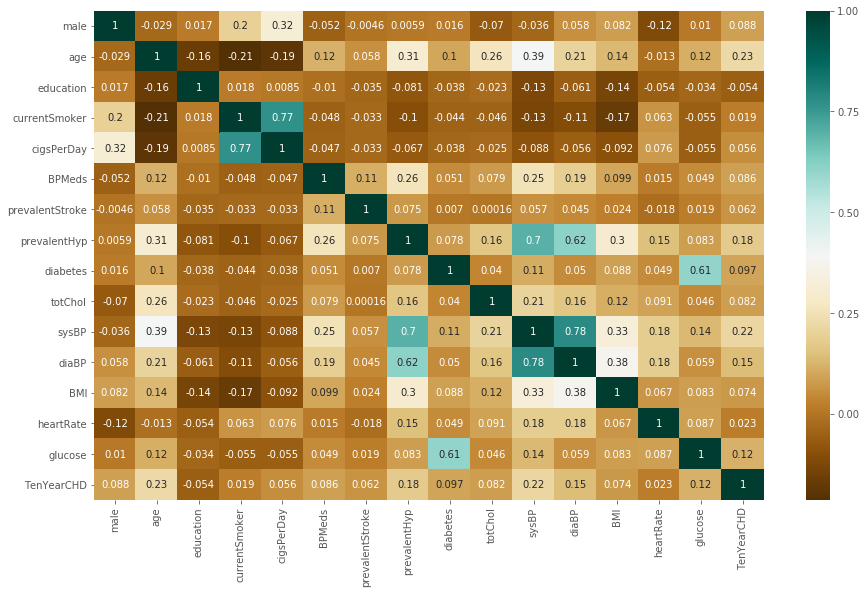

In [19]:
plt.figure(figsize=(15,9))
sns.heatmap(framingham.corr()
            ,cmap="BrBG",annot=True)

In [20]:
framingham.drop(['PersonType','AgeType','hasHyper'],axis=1,inplace=True)

### Prepare the data

This is a highly imbalanced dataset with only roughly 15% of the observations lying in the category of having a high risk of contracting a cardiac disease.

In [21]:
X = framingham.drop(['TenYearCHD','education'],axis=1)

y = framingham.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23)

In [22]:
y_train = pd.DataFrame(y_train)
y_train

,TenYearCHD
912,0
3104,0
4202,0
551,1
6,1
327,0
913,0
886,1
3254,1
965,1


In [23]:
y.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [24]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

0.8594339622641509


The model accuracy on test data is 85.8%. 

Due to an imbalanced dataset, let's compare with our baseline model 

In [26]:
# examine the class distribution of the testing set
y_test.value_counts()

0    908
1    152
Name: TenYearCHD, dtype: int64

In [27]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

0    0.856604
Name: TenYearCHD, dtype: float64

#### The null accuracy is 85.6%. There is only a slight improvement in accuracy for our model from the baseline model.

#### Accuracy is not an appropriate metric in this scenario. We employ confusion matrix and ROC curve to further understand performance of our model on test data.


In [28]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[905   3]
 [146   6]]


Here the false negatives are very high which means most of the predictions around 146 patients are wrongly classifed as healthy when in reality they are sick.
Our aim is to be able to detect the risk of heart disease more precisely even if we have to compromise on the false positives. It is very crucial to reduce the false negatives as a person's health is jeopardised once he is wrongly identified as healthy when in actual he is sick. 

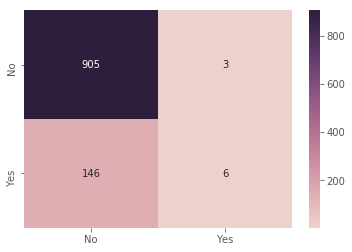

In [29]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [30]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

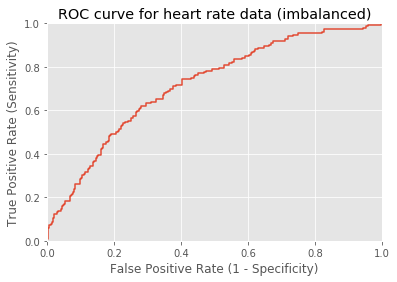

In [31]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data (imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [32]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.716279


#### Let us retrain our data using Random Forest this time using a class_weight as 'balanced' which would handle imbalance in the data by changing the threshold set by logistic regression model:

# Random Forest

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
X_train.shape

(3180, 14)

In [35]:
params = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [3,5,10,11,12,13],
              "bootstrap": [True, False],
              'class_weight':['balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf=RandomForestClassifier()

In [38]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=20
                                    )

In [45]:
random_search.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [3, 5, 10, 11, 12, 13], 'bootstrap': [True, False], 'class_weight': ['balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_t

In [46]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [47]:
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [48]:
rf.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [49]:
rf_probabilities = rf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probabilities[:,1])

In [50]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.720301


Class weight as balanced has slightly improved the performance

# Feature importance

In [72]:
feat_imp_df=pd.DataFrame({'features':X_train.columns,'importance':rf.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
1,age,0.305888
9,sysBP,0.189587
10,diaBP,0.104976
6,prevalentHyp,0.072454
8,totChol,0.059666
11,BMI,0.055550
0,male,0.051099
3,cigsPerDay,0.049968
13,glucose,0.049419
12,heartRate,0.041025


# Interpretation

In [56]:
var_name='age'

preds=rf.predict_proba(X_train)[:,1]
# part_dep_data

In [57]:
var_data=pd.DataFrame({'Age':X_train[var_name],'response':preds})

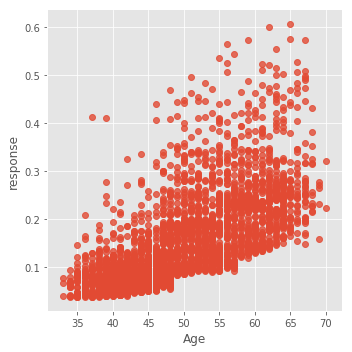

In [58]:
import seaborn as sns

sns.lmplot(x='Age',y='response',data=var_data,fit_reg=False)

In [59]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['Age'])

# smooth_data

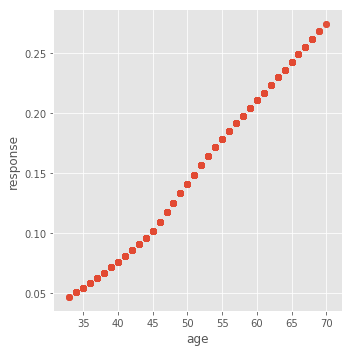

In [60]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)